# Monthly Report (รายงานประจำเดือน)

In [25]:
import pandas as pd
#from pandas_datareader import data
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
import pickle
from matplotlib.ticker import FuncFormatter # for custom number format on x and y axis
%matplotlib inline
%config InlineBackend.figure_format='retina'

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:,.0f}'.format)

print(f"pandas  version = {pd.__version__}")
pd.Timestamp.today()

pandas  version = 1.0.5


Timestamp('2020-12-01 17:37:08.319414')

# กำหนดเดือนปัจจุบัน

In [ ]:
FILES =  'data\\transection.pickle'
files = FILES

In [10]:

m = 11
years = 2020

## Function

In [12]:
def read_pickle(files =FILES):
    # ดึงข้อมูลเดิมขุึ้นมา

    pickle_off = open(files,"rb")
    df = pickle.load(pickle_off)
    return df

def write_pickle(data,files =None ):
    pickling_on = open(files,"wb")
    pickle.dump(data, pickling_on)
    pickling_on.close()
    print('dump success')

In [29]:
data =  read_pickle()
data

,company,type,month,year,price,count
1,กัลล์ วิง บจก.,CONT,11,2012,120,10
2,กัลล์ วิง บจก.,XDEC,2,2013,375,15
3,กัลล์ วิง บจก.,XDEC,11,2012,30,1
4,กัลล์ วิง บจก.,XDEC,11,2012,29,1
5,กัลล์ วิง บจก.,XDEC,8,2012,59,1
...,...,...,...,...,...,...
1142884,หจก. ไฮบริด เฟรท โลจิสติกส,XDEC,5,2020,36,1
1142885,หจก. ไฮบริด เฟรท โลจิสติกส,XDEC,8,2020,186,3
1142886,หจก. ไฮบริด เฟรท โลจิสติกส,IDEC,2,2020,54,2
1142887,หจก. ไฮบริด เฟรท โลจิสติกส,XDEC,4,2020,45,1


In [36]:
data['year'].str

## อ่านข้อมูลจากฐานข้อมูล

#df = pd.read_excel('Charge_month.xlsx', 'Sheet1',  na_values=['NA'])
df = pd.read_excel('Export_Data\\transection_month_start_2014.xlsx', 'Sheet1',  na_values=['NA'])
df.index += 1

In [6]:
pickle_off = open(files,"rb")
df = pickle.load(pickle_off)
df.head()

,company,type,month,year,price,count
0,company,type,month,year,price,count
1,กัลล์ วิง บจก.,CONT,11,2012,120,10
2,กัลล์ วิง บจก.,XDEC,2,2013,375,15
3,กัลล์ วิง บจก.,XDEC,11,2012,30,1
4,กัลล์ วิง บจก.,XDEC,11,2012,29,1


In [7]:
df.tail()

,company,type,month,year,price,count
1142884,หจก. ไฮบริด เฟรท โลจิสติกส,XDEC,5,2020,36.00,1
1142885,หจก. ไฮบริด เฟรท โลจิสติกส,XDEC,8,2020,186.00,3
1142886,หจก. ไฮบริด เฟรท โลจิสติกส,IDEC,2,2020,54.00,2
1142887,หจก. ไฮบริด เฟรท โลจิสติกส,XDEC,4,2020,45.00,1
1142888,ห้างหุ้นส่วนสามัญนิติบุคคล ซี.เอส. ชิปปิ้ง แอน...,CAR,7,2020,25.00,1


In [8]:
print('Before: ' ,df.shape)
# Drop Duplicate
df.drop_duplicates(keep= 'last', inplace=True)
print('After: ' , df.shape)

Before:  (1142882, 6)
After:  (1142882, 6)


## ปรับชื่อบริษัท 

In [10]:
df['company'] = df['company'].str.strip()
df

,company,type,month,year,price,count
0,กัลล์ วิง บจก.,CONT,11,2012,120.00,10
1,กัลล์ วิง บจก.,XDEC,2,2013,375.00,15
2,กัลล์ วิง บจก.,XDEC,11,2012,30.00,1
3,กัลล์ วิง บจก.,XDEC,11,2012,29.00,1
4,กัลล์ วิง บจก.,XDEC,8,2012,59.00,1
...,...,...,...,...,...,...
1091656,อินเตอร์เนชั่นแนลคัสตอมส์โบรกเกอร์ บจก.,CONT,1,2016,36.00,3
1091657,อินเตอร์เนชั่นแนลคัสตอมส์โบรกเกอร์ บจก.,XDEC,2,2016,356.00,4
1091658,อินเตอร์เนชั่นแนลคัสตอมส์โบรกเกอร์ บจก.,CONT,7,2016,36.00,3
1091659,อินเตอร์เนชั่นแนลคัสตอมส์โบรกเกอร์ บจก.,XDEC,11,2016,30.00,3


In [19]:

#df['company'] = df['company'].str.replace("ซีวา เฟรท(ประเทศไทย)  (สาขา A สำนักงานใหญ่)","ซีวา เฟรท(ประเทศไทย)")
#df['company'] =df['company'].str.replace('ชัยรักษ์พัฒนา เซอร์วิส','ชัยรักษ์พัฒนา เซอร์วิส (Export)')
#df['company'] =df['company'].str.replace('ทีเอ็นทีที โลจิสติกส์ (สำนักงานใหญ่ ฉะเชิงเทรา)','TNTT LOGISTICS CO.,LTD.')



df = df.groupby(['company','type','year','month']).sum()
df = df.reset_index()
df = df.loc[:, ['company','type','year','month','price','count']]
df

,company,type,year,month,price,count
0,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,RGOODSPMT,2017,6,385.00,11
1,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,RGOODSPMT,2017,7,455.00,13
2,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,RGOODSPMT,2017,8,70.00,2
3,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,RGOODSPMT,2017,11,70.00,2
4,กรมวิทยาศาสตร์การแพทย์ กระทรวงสาธารณสุข,RGOODSPMT,2017,12,175.00,5
...,...,...,...,...,...,...
180401,ไทยอคริลิค ไฟเบอร์ บจก.,XDEC,2012,1,2800,112
180402,ไทยอคริลิค ไฟเบอร์ บจก.,XDEC,2012,2,332530,1333
180403,ไทยอคริลิค ไฟเบอร์ บจก.,XDEC,2012,3,304000,3160
180404,ไทยอคริลิค ไฟเบอร์ บจก.,XDEC,2012,4,302500,3100


## Import data from database

In [26]:
df =  read_pickle()
df.sample(20)

,company,type,month,year,price,count
683294,บริษัท พรีเมียร์ รีซอร์เซส จำกัด,XDEC,3,2017,147,3
1142711,หจก. ไฮบริด เฟรท โลจิสติกส,XDEC,7,2020,108,3
521113,บริษัท ซีทีไอ โลจิสติกส์ จำกัด,IDEC,10,2017,450,9
133788,บริษัท ไทยโลจิซทิคส์ เซอร์วิส จำกัด,XDEC,2,2013,200,1
298909,บริษัท สยามนิปปอนสตีล ลอจิสติคส์ จำกัด,IDEC,10,2012,160,2
1030397,บริษัท ซียู.ดับบลิว.โลจิสติกส์ จำกัด,IDEC,11,2020,200,2
771586,บริษัท เลสชาโก้ คัสตอม เคลียเรนซ์ (ประเทศไทย) ...,XDEC,4,2017,43,1
83830,บริษัท ซีวา เฟรท(ประเทศไทย) จำกัด (สาขา A สำนั...,IDEC,12,2015,114,1
1132586,บริษัท ฮวงเอ ชิพปิ้ง จำกัด,MMAN,5,2020,156,1
339898,บริษัท เอ็กซิมเน็ท จำกัด,XDEC,5,2015,957,29


In [27]:

df.describe()

,company,type,month,year,price,count
count,1142881,1142881,1142881,1142881,1142881,1142881
unique,1132,24,24,13,9720,4371
top,บริษัท เอ็กซิมเน็ท จำกัด,IDEC,11,2019,10,1
freq,41591,558152,88549,155104,19811,461011


In [40]:
df[['company', 'price','count']].groupby('company','year','month').aggregate({'price':'sum'}).reset_index().sort_values('price',ascending=False)

ValueError: No axis named year for object type <class 'pandas.core.frame.DataFrame'>

In [41]:

df_year = df.groupby(['company', 'year','month']).sum()
pv_year = pd.pivot_table(df_year, values='price', aggfunc='mean', index=['company'], columns=['year'])
pv_year=pv_year.sort_values(by=years, ascending=False)

pv_year.head()

DataError: No numeric types to aggregate

In [ ]:
df[['company', 'year','month']].groupby('company').aggregate({'review':'count'}).reset_index().sort_values('review',ascending=False)

In [38]:
df_year =df.groupby(['company', 'year','month']).sum()
pv_year = pd.pivot_table(df_year, values='price', index=['company'], columns=['year'])
pv_year=pv_year.sort_values(by=years, ascending=False)
pv_year.head(30)

DataError: No numeric types to aggregate

In [57]:
pv_year.shape

(1124, 9)

In [58]:
pv_year.describe()

year,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,474.00,507.00,517.00,575.00,677.00,754.00,810.00,829.00,806.00
mean,"9,801.09","9,278.21","9,676.12","9,220.11","8,560.18","8,660.16","8,534.85","8,441.43","7,896.80"
std,"31,120.37","30,838.01","33,653.72","31,883.58","33,318.59","34,743.01","34,369.38","30,548.27","27,541.09"
min,25.00,0.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00
25%,778.88,726.21,770.92,784.54,457.58,431.00,439.75,492.00,455.47
50%,"2,719.00","2,249.25","2,326.75","2,266.33","1,691.33","1,644.21","1,777.32","1,962.75","1,883.61"
75%,"7,385.08","6,615.96","7,214.79","7,316.50","5,880.00","5,450.75","5,952.67","6,381.17","6,136.39"
max,"518,738.58","509,308.42","573,795.00","536,624.17","650,550.67","699,292.50","703,720.67","591,197.58","516,638.22"


In [59]:
pv_year.sum()

year
2012   4,645,715.56
2013   4,704,050.87
2014   5,002,551.70
2015   5,301,560.57
2016   5,795,239.31
2017   6,529,759.20
2018   6,913,229.65
2019   6,997,948.40
2020   6,364,817.30
dtype: float64

In [60]:
years = df.year.unique()
years.sort()
sou_sum = list(pv_year.sum())
#del sou_sum[6]
sr_cus = pd.Series(sou_sum,
                    index=years)

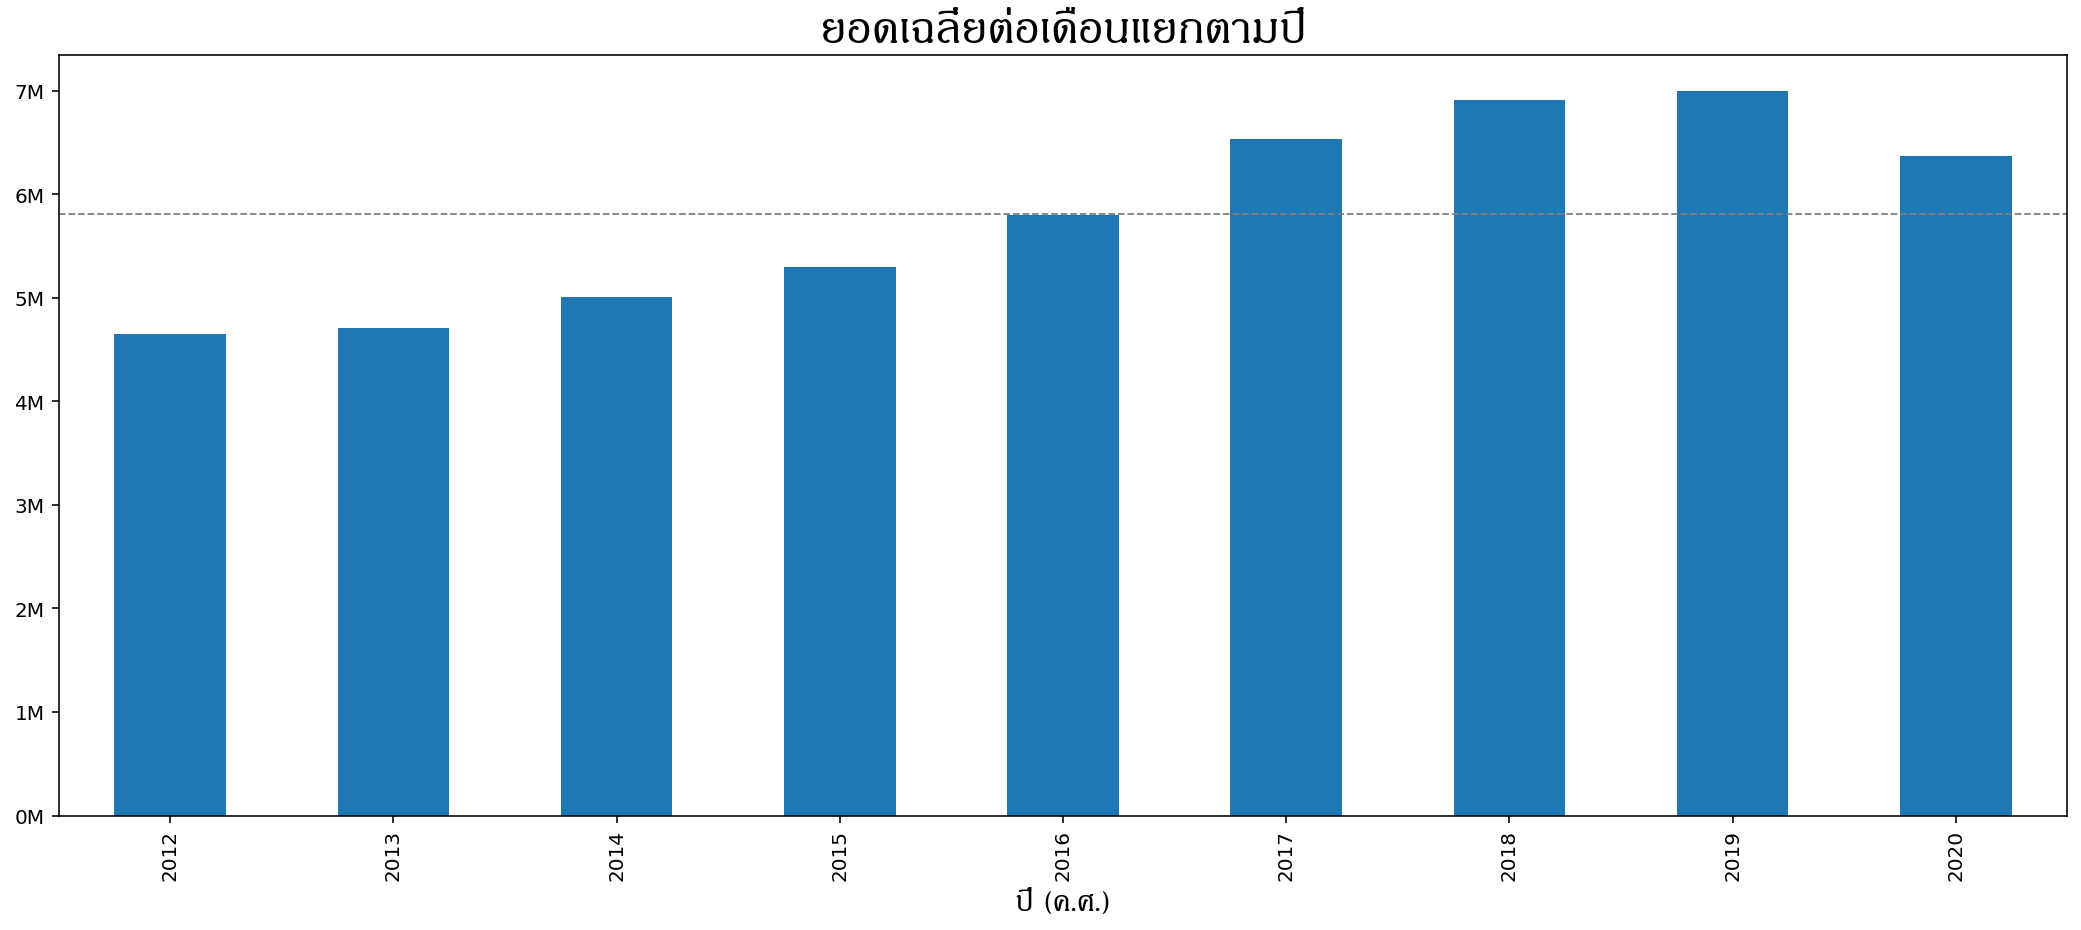

In [61]:
ax=sr_cus.plot(kind='bar', figsize=(18, 7)) 
ax.set_title(u'ยอดเฉลี่ยต่อเดือนแยกตามปี',fontname='JasmineUPC',fontsize=30)
ax.axhline(sr_cus.mean(), color="gray", linestyle="--", linewidth=.9)
#ax.set_ylabel(u'จำนวน (บริษัท)',fontname='JasmineUPC',fontsize=20)
ax.set_xlabel(u'ปี (ค.ศ.)',fontname='JasmineUPC',fontsize=20);
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, p: "{:,.0f}M".format(v / 1000000)));

# ปีปัจจุบัน (รายเดือน)

In [26]:
df_curr = df[(df.year == 2020)]
df_curr = df_curr.groupby(['company', 'month']).sum()
df_curr.describe()

,year,price,count
count,"6,528.00","6,528.00","6,528.00"
mean,"5,901.26","8,626.77",367.22
std,"3,241.81","29,196.60","1,185.55"
min,"2,020.00",0.00,1.00
25%,"4,040.00",589.00,24.00
50%,"6,060.00","2,073.50",86.00
75%,"8,080.00","6,625.75",277.00
max,"20,200.00","623,131.00","20,930.00"


In [27]:


pv_curr = pd.pivot_table(df_curr, values='price', aggfunc='mean', index=['company'], columns=['month'])
pv_curr['change']=(pv_curr[m] - pv_curr[m-1])/pv_curr[m-1]*100
pv_curr.sort_values(by=m, ascending=False)

month,1,2,3,4,5,6,7,8,9,change
company,,,,,,,,,,
บริษัท เอ็กซิมเน็ท จำกัด,"574,456.00","541,917.00","623,131.00","511,015.00","456,973.00","470,335.00","483,743.00","471,665.00","516,509.00",2.85
บริษัท วี-เซิร์ฟ โลจิสติกส์ จำกัด,"322,148.00","313,919.00","344,887.00","342,302.00","285,703.00","303,276.00","307,674.00","313,762.00","322,355.00",1.45
บริษัท เลสชาโก้ (ประเทศไทย) จำกัด,"251,650.00","214,250.00","273,802.00","216,569.00","189,822.00","194,707.00","208,837.00","216,334.00","206,082.00",7.26
บริษัท ซีทีไอ โลจิสติกส์ จำกัด,"207,809.00","199,054.00","204,534.00","188,351.00","169,357.00","190,825.00","200,632.00","195,911.00","215,098.00",5.14
บริษัท ไทยสมเด็จ เซอร์วิส จำกัด,"185,008.00","152,786.00","166,084.00","102,373.00","113,803.00","164,756.00","170,614.00","169,836.00","171,826.00",3.56
...,...,...,...,...,...,...,...,...,...,...
หจก. ท่าทรายศรีเผย มุกดาหาร,"23,275.00","2,025.00",nan,nan,nan,nan,nan,nan,nan,nan
หจก. พี ทองชู เซอร์วิสเซส,"7,712.00","2,484.00","1,042.00",nan,nan,nan,nan,36.00,nan,nan
หจก. อิสมา (ไทยแลนด์),nan,nan,35.00,nan,nan,nan,nan,35.00,nan,nan


## เขียนข้อมูลลงไฟล์

data = pv_year.head(30)
data.to_excel('data/top30_2019.xlsx')
print('success')



In [28]:
pv_curr.sum()

month
1        6,867,564.00
2        6,214,939.00
3        6,945,076.50
4        6,005,060.00
5        5,627,139.50
6        5,845,568.00
7        6,047,569.00
8        6,257,064.50
9        6,505,599.50
change      20,661.00
dtype: float64

In [38]:
pv_curr_sum = list(pv_curr.sum())
print(pv_curr_sum)
pv_curr_sum[m]

[6867564.0, 6214939.0, 6945076.5, 6005060.0, 5627139.5, 5845568.0, 6047569.0, 6257064.5, 6505599.5, 20660.999234379597]


20660.999234379597

In [46]:
# ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']

pv_curr_sum = list(pv_curr.sum())
del pv_curr_sum[m]
sr_cus = pd.Series(pv_curr_sum,
                    index=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep'])

In [47]:
pv_curr_sum

[6867564.0,
 6214939.0,
 6945076.5,
 6005060.0,
 5627139.5,
 5845568.0,
 6047569.0,
 6257064.5,
 6505599.5]

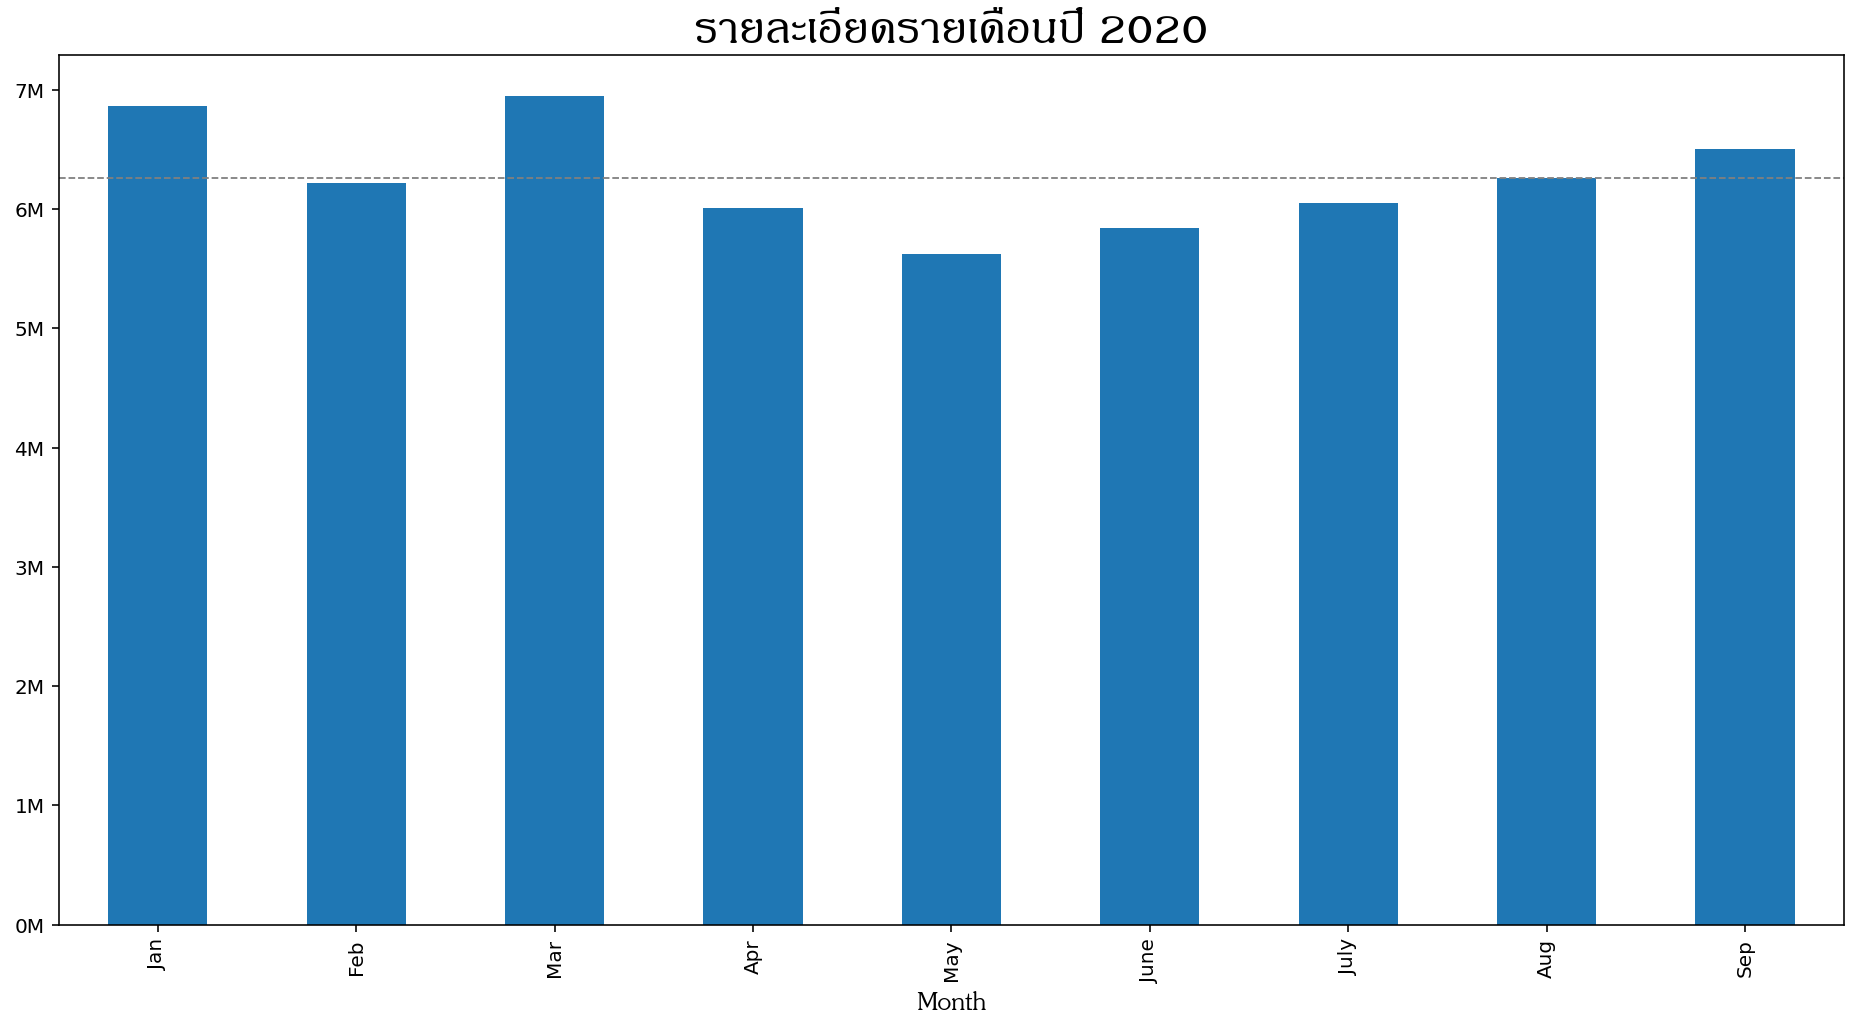

In [48]:
ax=sr_cus.plot(kind='bar',figsize=(16, 8)) 
ax.set_title(u'รายละเอียดรายเดือนปี 2020',fontname='JasmineUPC',fontsize=30)
ax.axhline(sr_cus.mean(), color="gray", linestyle="--", linewidth=.9)
ax.set_xlabel(u'Month',fontname='JasmineUPC',fontsize=20);
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, p: "{:,.0f}M".format(v / 1000000)));

In [42]:
# ตรวจสอบบริษัทที่มีการเปลี่ยนแปลงมาก
pv_curr.sort_values(by='change')

month,1,2,3,4,5,6,7,8,9,change
company,,,,,,,,,,
บริษัท เตียวฮงสีลม จำกัด,105.00,70.00,105.00,140.00,35.00,455.00,35.00,140.00,35.00,-92.31
บริษัท คอสโมอินดัสตรีส์ จำกัด,382.00,407.00,226.00,176.00,193.00,529.00,97.00,nan,320.00,-81.66
บริษัท เอเชีย แอตแลนติก ไลน์เนอร์ จำกัด,nan,nan,nan,nan,nan,840.00,195.00,627.00,992.00,-76.79
หจก. บางกอกเคมาร์ท,nan,140.00,nan,70.00,nan,140.00,35.00,35.00,140.00,-75.00
บริษัท เกทเวย์ คอนเทนเนอร์ ไลน์ จำกัด,671.00,276.00,575.00,"1,053.00",634.00,"1,131.00",310.00,405.00,753.00,-72.59
...,...,...,...,...,...,...,...,...,...,...
หจก. พี ทองชู เซอร์วิสเซส,"7,712.00","2,484.00","1,042.00",nan,nan,nan,nan,36.00,nan,nan
หจก. อิสมา (ไทยแลนด์),nan,nan,35.00,nan,nan,nan,nan,35.00,nan,nan
หจก. เอก-อำนวยฟาร์ม เซอร์วิส,nan,nan,nan,nan,343.00,37.00,nan,nan,nan,nan


df.to_csv('new_purchases.csv')

In [43]:
# ดึงข้อมูลปีปัจจุบันและปีก่อนหน้า
df_2018= df[(df.year == 2020) |(df.year == 2019)]
df_2018=df_2018.groupby(['company', 'year','month']).sum()
df_2018.describe()

,price,count
count,"15,233.00","15,233.00"
mean,"9,040.21",381.27
std,"31,195.38","1,251.04"
min,0.00,1.00
25%,595.00,24.00
50%,"2,146.00",91.00
75%,"6,935.00",293.00
max,"657,174.00","22,727.00"


# เปรียบเทียบ Ranking

In [44]:
pv_2018=pd.pivot_table(df_2018, values='price', aggfunc='mean', index=['company'], columns=['year'])
pv_2018['change']=(pv_2018[2020]-pv_2018[2019])/pv_2018[2019]*100
pv_2018['Ranked_2019']=pv_2018[2019].rank(ascending=0,method='max')
pv_2018['Ranked_2020']=pv_2018[2020].rank(ascending=0,method='max')
pv_2018['Rank_Change']=pv_2018['Ranked_2019']-pv_2018['Ranked_2020']
pv_2018=pv_2018.sort_values(by='Ranked_2020')
pv_2018.head(20)

year,2019,2020,change,Ranked_2019,Ranked_2020,Rank_Change
company,,,,,,
บริษัท เอ็กซิมเน็ท จำกัด,"591,197.58","516,638.22",-12.61,1.00,1.00,0.00
บริษัท วี-เซิร์ฟ โลจิสติกส์ จำกัด,"320,995.83","317,336.22",-1.14,2.00,2.00,0.00
บริษัท เลสชาโก้ (ประเทศไทย) จำกัด,"261,850.00","219,117.00",-16.32,3.00,3.00,0.00
บริษัท ซีทีไอ โลจิสติกส์ จำกัด,"212,052.58","196,841.22",-7.17,4.00,4.00,0.00
บริษัท ไทยสมเด็จ เซอร์วิส จำกัด,"206,718.00","155,231.78",-24.91,5.00,5.00,0.00
บริษัท เค.จี.เอ็ม.เซอร์วิส จำกัด,"172,000.58","144,271.56",-16.12,6.00,6.00,0.00
บริษัท เอฟ ที เอส บริการขนส่ง บจก.,"142,745.75","136,734.33",-4.21,8.00,7.00,1.00
บริษัท ไพโอเนียร์ แอร์คาร์โก้ จำกัด,"145,654.75","106,200.44",-27.09,7.00,8.00,-1.00
บริษัท บีดีพี เอเชีย-แปซิฟิค จำกัด,"126,039.42","105,777.44",-16.08,9.00,9.00,0.00


# คำนวณการใช้งานเมื่อเทียบกับยอดรวม

In [45]:
a_2018=pd.pivot_table(df_2018, values='price', aggfunc='mean', index=['company'], columns=['year'])
a_2018 = a_2018.transform(lambda x: x/x.sum()*100)
a_2018 = a_2018.sort_values(by=2020, ascending=False)
a_2018.head(20)

year,2019,2020
company,,
บริษัท เอ็กซิมเน็ท จำกัด,8.45,8.12
บริษัท วี-เซิร์ฟ โลจิสติกส์ จำกัด,4.59,4.99
บริษัท เลสชาโก้ (ประเทศไทย) จำกัด,3.74,3.44
บริษัท ซีทีไอ โลจิสติกส์ จำกัด,3.03,3.09
บริษัท ไทยสมเด็จ เซอร์วิส จำกัด,2.95,2.44
บริษัท เค.จี.เอ็ม.เซอร์วิส จำกัด,2.46,2.27
บริษัท เอฟ ที เอส บริการขนส่ง บจก.,2.04,2.15
บริษัท ไพโอเนียร์ แอร์คาร์โก้ จำกัด,2.08,1.67
บริษัท บีดีพี เอเชีย-แปซิฟิค จำกัด,1.80,1.66


## Write to Excel

In [31]:
data = a_2018.head(50)
data.to_excel('data\\report_summary.xlsx' ,index=True)
print('Write to Excel success')

Write to Excel success


# ไม่รวม KWE

In [32]:
pv = pv_year

# ลบข้อมูล KWE + reset index
pv = pv.drop('บริษัท เอ็กซิมเน็ท จำกัด', axis=0)
pv.reset_index(drop=True)

pv.head(30)

year,2012,2013,2014,2015,2016,2017,2018,2019,2020
company,,,,,,,,,
บริษัท วี-เซิร์ฟ โลจิสติกส์ จำกัด,"222,909.50","241,667.00","280,047.42","289,288.25","298,660.58","331,236.08","340,344.92","320,995.83","317,129.86"
บริษัท เลสชาโก้ (ประเทศไทย) จำกัด,"83,597.42","176,438.17","169,701.58","209,794.67","219,236.67","262,767.42","292,143.67","261,850.00","221,376.71"
บริษัท ซีทีไอ โลจิสติกส์ จำกัด,"171,909.17","182,861.08","194,264.75","220,384.83","214,116.25","231,828.67","235,854.08","212,052.58","194,366.00"
บริษัท ไทยสมเด็จ เซอร์วิส จำกัด,"92,064.67","102,697.50","114,574.08","123,836.67","148,586.33","178,739.08","204,529.67","206,718.00","150,774.86"
บริษัท เค.จี.เอ็ม.เซอร์วิส จำกัด,"67,442.00","89,468.75","116,668.08","122,793.92","138,072.33","149,195.00","165,686.17","172,000.58","146,881.71"
...,...,...,...,...,...,...,...,...,...
บริษัท สยามนิปปอนสตีล ลอจิสติคส์ จำกัด,"41,268.92","38,421.17","38,431.33","37,972.75","39,153.42","41,007.17","43,339.58","43,688.42","39,960.71"
บริษัท ไทยอุน จำกัด,"19,090.75","18,908.42","21,657.92","26,111.58","29,027.25","39,199.08","43,784.83","40,045.25","36,812.00"
บริษัท ไอยรา เออีซี จำกัด,nan,nan,nan,nan,nan,nan,nan,"12,869.08","36,566.57"


In [33]:
pv.describe()

year,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,473.00,506.00,516.00,574.00,676.00,753.00,808.00,828.00,792.00
mean,"8,725.10","8,290.00","8,582.86","8,301.28","7,610.49","7,742.97","7,682.13","7,737.62","7,298.91"
std,"20,508.62","21,372.37","22,707.98","23,066.31","22,366.82","23,949.25","24,177.31","22,873.18","21,012.61"
min,25.00,0.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00
25%,778.83,725.94,765.19,784.23,456.97,430.67,438.96,491.02,483.11
50%,"2,714.67","2,243.21","2,319.25","2,265.54","1,690.54","1,638.83","1,776.98","1,960.12","1,947.43"
75%,"7,301.75","6,579.33","7,173.70","7,290.60","5,865.25","5,369.00","5,938.00","6,374.92","6,101.86"
max,"222,909.50","241,667.00","280,047.42","289,288.25","298,660.58","331,236.08","340,344.92","320,995.83","317,129.86"


In [34]:
pv.sum()

year
2012   4,126,971.14
2013   4,194,742.46
2014   4,428,756.70
2015   4,764,936.40
2016   5,144,688.65
2017   5,830,458.53
2018   6,207,160.35
2019   6,406,750.81
2020   5,780,737.38
dtype: float64

In [35]:
 df.year.unique()

array([2017, 2018, 2019, 2020, 2012, 2013, 2015, 2014, 2016], dtype=int64)

In [36]:
years = df.year.unique()
years.sort()
sou_sum = list(pv.sum())
#del sou_sum[6]
sr_cus_k = pd.Series(sou_sum,
                    index=years)

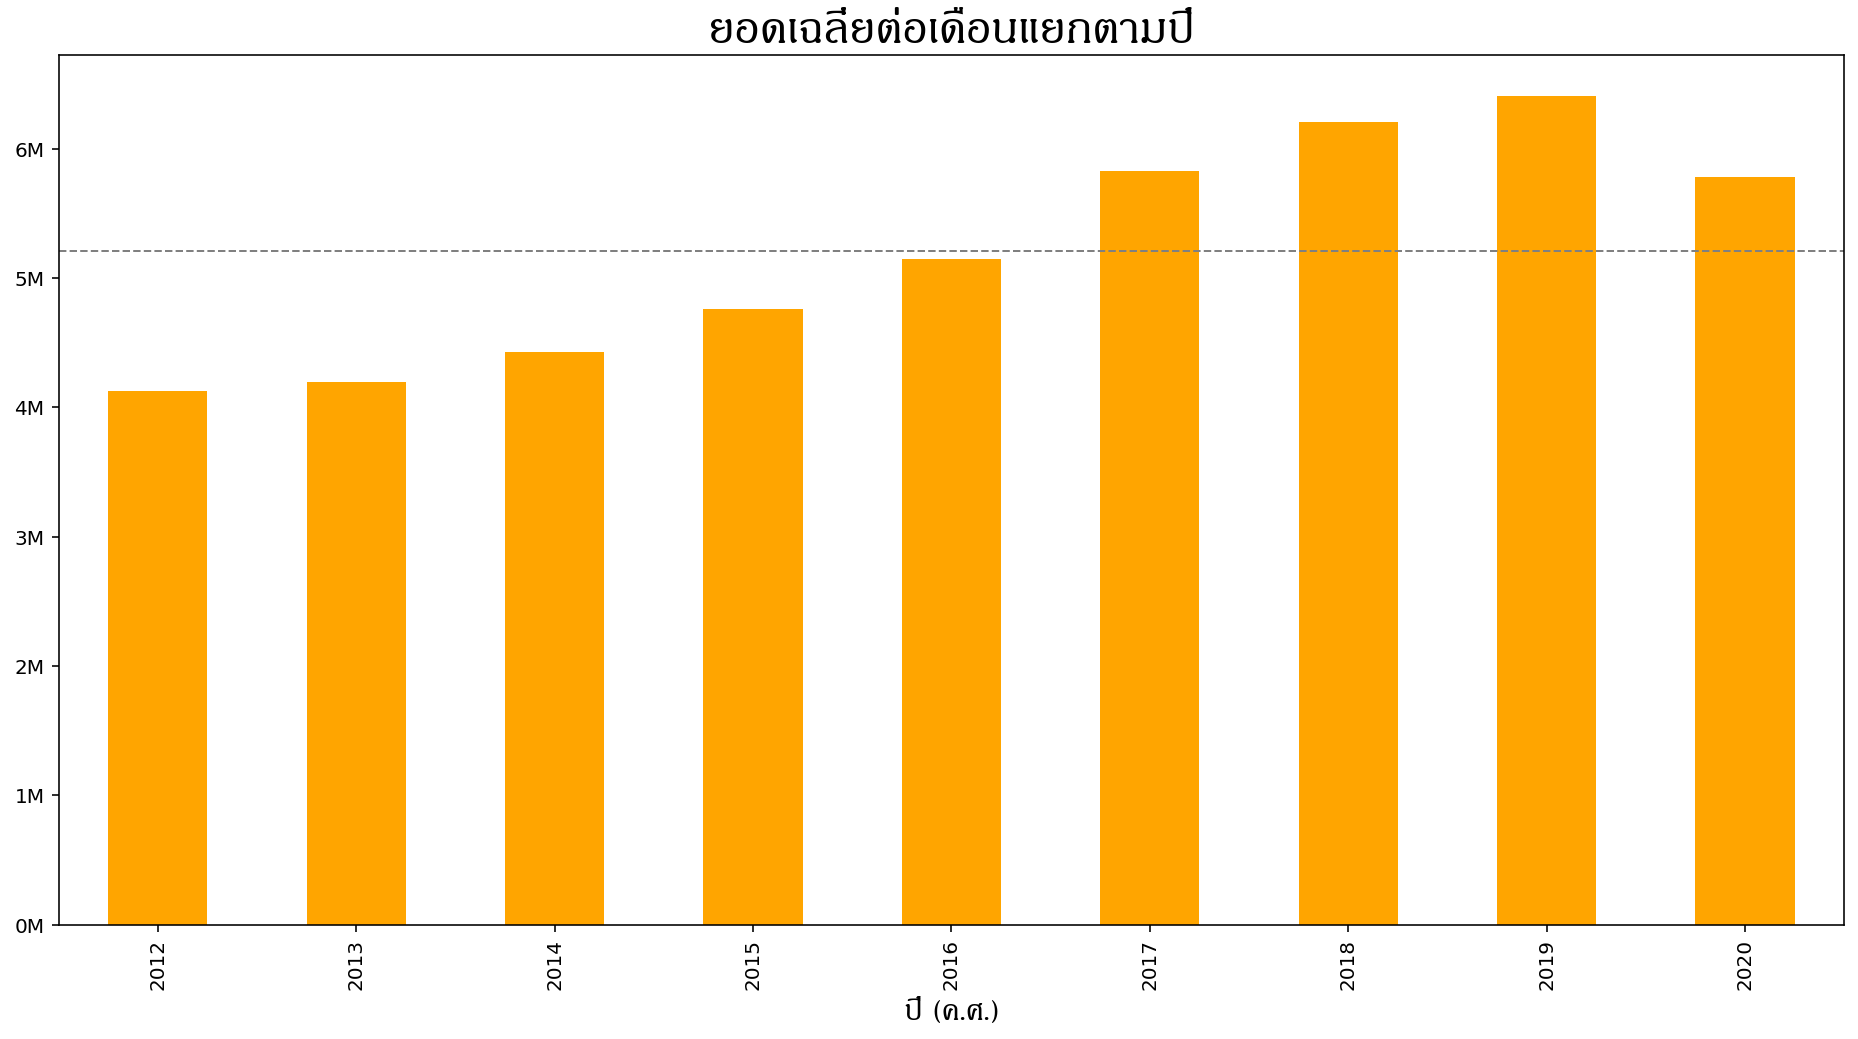

In [37]:
ax=sr_cus_k.plot(kind='bar', color="orange",figsize=(16, 8)) 
ax.set_title(u'ยอดเฉลี่ยต่อเดือนแยกตามปี',fontname='JasmineUPC',fontsize=30)
ax.axhline(sr_cus_k.mean(), color="gray", linestyle="--", linewidth=1)
#ax.set_ylabel(u'จำนวน (บริษัท)',fontname='JasmineUPC',fontsize=20)
ax.set_xlabel(u'ปี (ค.ศ.)',fontname='JasmineUPC',fontsize=20);
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, p: "{:,.0f}M".format(v / 1000000)));

# ปีปัจจุบัน (รายเดือน)

In [38]:
data = pd.pivot_table(df_curr, values='price', aggfunc='mean', index=['company'], columns=['month'])
data['change']=(data[m]-data[m-1])/data[m-1]*100
data.sort_values(by=m, ascending=False)
data = data.drop('บริษัท เอ็กซิมเน็ท จำกัด', axis=0)
data.reset_index(drop=True)
data = data.sort_values(by= m, ascending=False)
data.head(20)

month,1,2,3,4,5,6,7,change
company,,,,,,,,
บริษัท วี-เซิร์ฟ โลจิสติกส์ จำกัด,"322,148.00","313,919.00","344,887.00","342,302.00","285,703.00","303,276.00","307,674.00",1.45
บริษัท เลสชาโก้ (ประเทศไทย) จำกัด,"251,650.00","214,250.00","273,802.00","216,569.00","189,822.00","194,707.00","208,837.00",7.26
บริษัท ซีทีไอ โลจิสติกส์ จำกัด,"207,809.00","199,054.00","204,534.00","188,351.00","169,357.00","190,825.00","200,632.00",5.14
บริษัท ไทยสมเด็จ เซอร์วิส จำกัด,"185,008.00","152,786.00","166,084.00","102,373.00","113,803.00","164,756.00","170,614.00",3.56
บริษัท เอฟ ที เอส บริการขนส่ง บจก.,"147,316.00","125,319.00","144,066.00","135,938.00","117,568.00","136,733.00","143,206.00",4.73
บริษัท เค.จี.เอ็ม.เซอร์วิส จำกัด,"167,088.00","148,400.00","180,044.00","153,336.00","129,296.00","127,718.00","122,290.00",-4.25
บริษัท อีสเทิร์น แอร์ โลจิสติกส์ จำกัด,"113,737.00","98,270.00","119,561.00","101,469.00","72,936.00","91,037.00","104,789.00",15.11
บริษัท ไดนามิคอินเตอร์ทรานสปอร์ต จำกัด,"97,194.00","99,147.00","113,036.00","117,914.00","114,688.00","108,764.00","100,364.00",-7.72
บริษัท ไพโอเนียร์ แอร์คาร์โก้ จำกัด,"130,153.00","124,068.00","145,519.00","80,320.00","78,314.00","89,369.00","98,218.00",9.90


In [43]:
dfk_2018= df[(df.year == 2020) |(df.year == 2019)]
dfk_2018=dfk_2018.groupby(['company', 'year','month']).sum()
dfk_2018 = dfk_2018.drop('บริษัท เอ็กซิมเน็ท จำกัด', axis=0)
dfk_2018.reset_index(drop=True)
dfk_2018.describe()

,price,count
count,"13,742.00","13,742.00"
mean,"8,309.62",355.05
std,"23,624.69","1,024.25"
min,0.00,1.00
25%,595.00,24.00
50%,"2,149.00",91.00
75%,"6,931.50",292.00
max,"353,057.00","16,455.00"


# เปรียบเทียบ Ranking

In [44]:
pvk_2018=pd.pivot_table(dfk_2018, values='price', aggfunc='mean', index=['company'], columns=['year'])
pvk_2018['Change']=(pvk_2018[2020]-pvk_2018[2019])/pvk_2018[2019]*100
pvk_2018['Ranked_2018']=pvk_2018[2019].rank(ascending=0,method='max')
pvk_2018['Ranked_2019']=pvk_2018[2020].rank(ascending=0,method='max')
pvk_2018['Rank_Change']=pvk_2018['Ranked_2018']-pvk_2018['Ranked_2019']
pvk_2018=pvk_2018.sort_values(by='Ranked_2019')
pvk_2018.head(20)

year,2019,2020,Change,Ranked_2018,Ranked_2019,Rank_Change
company,,,,,,
บริษัท วี-เซิร์ฟ โลจิสติกส์ จำกัด,"320,995.83","317,129.86",-1.20,1.00,1.00,0.00
บริษัท เลสชาโก้ (ประเทศไทย) จำกัด,"261,850.00","221,376.71",-15.46,2.00,2.00,0.00
บริษัท ซีทีไอ โลจิสติกส์ จำกัด,"212,052.58","194,366.00",-8.34,3.00,3.00,0.00
บริษัท ไทยสมเด็จ เซอร์วิส จำกัด,"206,718.00","150,774.86",-27.06,4.00,4.00,0.00
บริษัท เค.จี.เอ็ม.เซอร์วิส จำกัด,"172,000.58","146,881.71",-14.60,5.00,5.00,0.00
บริษัท เอฟ ที เอส บริการขนส่ง บจก.,"142,745.75","135,735.14",-4.91,7.00,6.00,1.00
บริษัท บีดีพี เอเชีย-แปซิฟิค จำกัด,"126,039.42","108,900.86",-13.60,8.00,7.00,1.00
บริษัท ไดนามิคอินเตอร์ทรานสปอร์ต จำกัด,"100,870.75","107,301.00",6.37,9.00,8.00,1.00
บริษัท ไพโอเนียร์ แอร์คาร์โก้ จำกัด,"145,654.75","106,565.86",-26.84,6.00,9.00,-3.00


In [45]:
pvk_2018.describe()

year,2019,2020,Change,Ranked_2018,Ranked_2019,Rank_Change
count,828.00,792.00,754.00,828.00,792.00,758.00
mean,"7,737.62","7,298.91",4.56,414.59,396.55,6.02
std,"22,873.18","21,012.61",109.30,239.32,228.84,64.59
min,0.00,0.00,-96.55,1.00,1.00,-383.00
25%,491.02,483.11,-25.64,207.75,198.75,-19.00
50%,"1,960.12","1,947.43",-9.92,414.50,396.50,6.00
75%,"6,374.92","6,101.86",9.80,621.25,594.25,33.75
max,"320,995.83","317,129.86","1,771.33",828.00,792.00,462.00


# คำนวณการใช้งานเมื่อเทียบกับยอดรวม

In [47]:
ak_2018=pd.pivot_table(dfk_2018, values='price', aggfunc='mean', index=['company'], columns=['year'])
ak_2018 = ak_2018.transform(lambda x: x/x.sum()*100)
ak_2018 = ak_2018.sort_values(by=2020, ascending=False)
ak_2018.head(20)

year,2019,2020
company,,
บริษัท วี-เซิร์ฟ โลจิสติกส์ จำกัด,5.01,5.49
บริษัท เลสชาโก้ (ประเทศไทย) จำกัด,4.09,3.83
บริษัท ซีทีไอ โลจิสติกส์ จำกัด,3.31,3.36
บริษัท ไทยสมเด็จ เซอร์วิส จำกัด,3.23,2.61
บริษัท เค.จี.เอ็ม.เซอร์วิส จำกัด,2.68,2.54
บริษัท เอฟ ที เอส บริการขนส่ง บจก.,2.23,2.35
บริษัท บีดีพี เอเชีย-แปซิฟิค จำกัด,1.97,1.88
บริษัท ไดนามิคอินเตอร์ทรานสปอร์ต จำกัด,1.57,1.86
บริษัท ไพโอเนียร์ แอร์คาร์โก้ จำกัด,2.27,1.84


In [6]:
df.to_excel('data/export_to_reporet.xlsx') 
print('success')

success
